# TruChain- Exploratory Data Analysis 

**Business Problem:**
- the goal is to identify the variables or factors that have a statistically significant impact on predicting the demand for shared electric cycles in the Indian market. Furthermore, the objective is to assess the degree to which these variables/factors accurately describe the patterns and trends in electric cycle demand.

**Dataset and Column Profiling:**:

- timestamp -  a field that represents the date and time of each observation, used to group the data based on time intervals.
- cnt - the count of new bike shares, representing the target variable that we aim to predict.
- t1 - real t1erature in C
- t2 - t1erature in C "feels like"
- hum - a boolean field indicating whether the observation was recorded on a weekend (1) or not (0)
- windspeed - a boolean field indicating whether the observation was recorded on a weekend (1) or not (0)
- weather_codecode - a boolean field indicating whether the observation was recorded on a weekend (1) or not (0)
    - 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
    - 2 = scattered clouds / few clouds
    - 3 = Broken clouds
    - 4 = Cloudy
    - 7 = Rain/ light Rain shower/ Light rain
    - 10 = rain with thunderstorm
    - 26 = snowfall
- isis_holiday - a boolean field indicating whether the observation was recorded on a holiday (1) or not (0).
- isweekend - a boolean field indicating whether the observation was recorded on a weekend (1) or not (0)
- season - a categorical variable representing the season during which the observation was recorded, with the following categories:
  - 0 = spring
  - 1 = summer
  - 2 = fall
  - 3 = winter.



**Importing required packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN, nan, NAN
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

**Loading data into Dataframe**

In [3]:
bike_data = pd.read_csv('london_merged.csv')
bike_data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [4]:
bike_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
# Converting timestamp object into timestamp64[ns] for finding useful insights
bike_data['timestamp'] = bike_data['timestamp'].astype('datetime64[ns]')

In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [7]:
bike_data.shape

(17414, 10)

In [8]:
bike_data.isnull().sum()/len(bike_data) * 100

timestamp       0.0
cnt             0.0
t1              0.0
t2              0.0
hum             0.0
wind_speed      0.0
weather_code    0.0
is_holiday      0.0
is_weekend      0.0
season          0.0
dtype: float64

In [9]:
bike_data.nunique()

timestamp       17414
cnt              3781
t1                 73
t2                 82
hum               143
wind_speed        103
weather_code        7
is_holiday          2
is_weekend          2
season              4
dtype: int64

In [10]:
bike_data.duplicated().sum()

0

**Observations:** 
- The dataset under consideration comprises 10886 rows with 12 independent features, of which 4 are categorical (Season, is_holiday, is_weekend, weather_code), and 7 are numerical/continuous features. Additionally, the dataset includes 1 datetime object.
- Furthermore, there are no missing or null values present in the dataset, indicating that it is complete. Moreover, no duplicated rows are present in the dataset, indicating that each observation is unique.

# Outlier Detection and Removal:

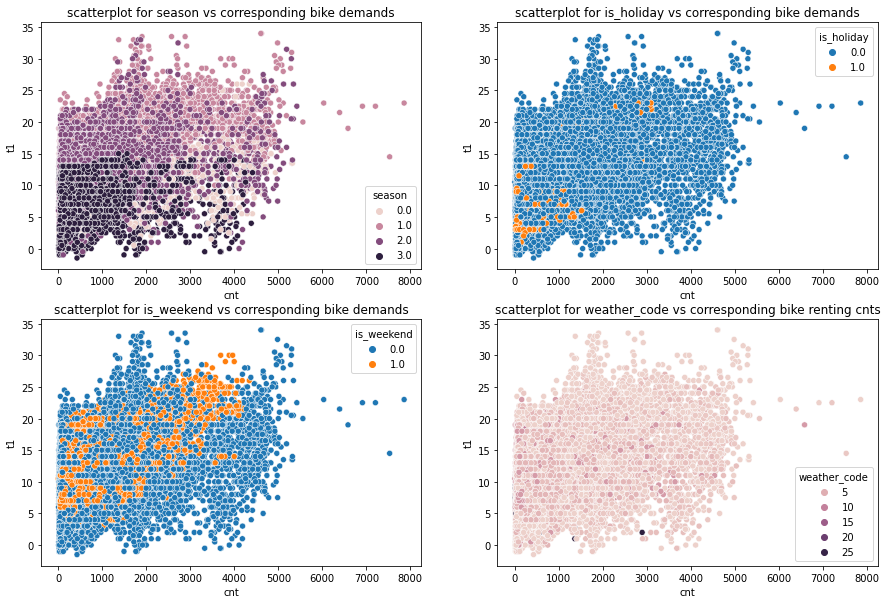

In [12]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.scatterplot(x = 'cnt', y = 't1',data = bike_data, hue ='season' )
ax1.set_title('scatterplot for season vs corresponding bike demands')

ax1 = fig.add_subplot(222)
sns.scatterplot(x ='cnt', y = 't1', data = bike_data, hue ='is_holiday')
ax1.set_title('scatterplot for is_holiday vs corresponding bike demands')

ax1 = fig.add_subplot(223)
sns.scatterplot(x = 'cnt', y = 't1',data = bike_data, hue ='is_weekend')
ax1.set_title('scatterplot for is_weekend vs corresponding bike demands')

ax1 = fig.add_subplot(224)
sns.scatterplot(x = 'cnt',y = 't1',data = bike_data, hue ='weather_code')
ax1.set_title('scatterplot for weather_code vs corresponding bike renting cnts')

plt.show()

In [13]:
bike_dcopy = bike_data.copy() # Taken backup of orginial dataset before removing outliers

In [14]:
q1=bike_data['cnt'].quantile(0.25)
q3=bike_data['cnt'].quantile(0.75)
iqr=q3-q1
bike_data = bike_data[(bike_data['cnt'] >= q1 - 1.5*iqr) & (bike_data['cnt'] <= q3 +1.5*iqr)]
bike_data.shape

(16739, 10)

In [15]:
bike_dcopy.shape[0] - bike_data.shape[0]

675

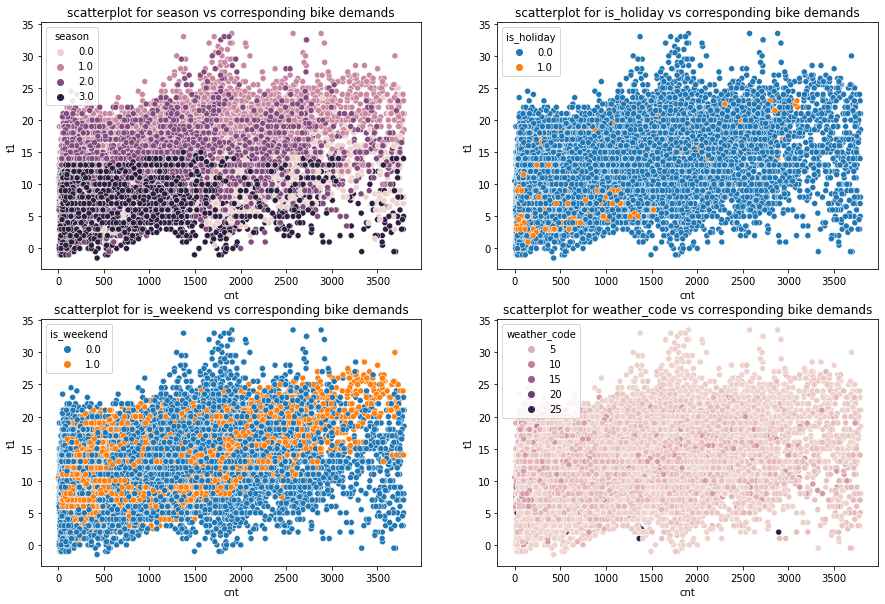

In [17]:
#Visualization after removing outliers
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.scatterplot(x = 'cnt', y = 't1',data = bike_data, hue ='season' )
ax1.set_title('scatterplot for season vs corresponding bike demands')

ax1 = fig.add_subplot(222)
sns.scatterplot(x ='cnt', y = 't1', data = bike_data, hue ='is_holiday')
ax1.set_title('scatterplot for is_holiday vs corresponding bike demands')

ax1 = fig.add_subplot(223)
sns.scatterplot(x = 'cnt', y = 't1',data = bike_data, hue ='is_weekend')
ax1.set_title('scatterplot for is_weekend vs corresponding bike demands')

ax1 = fig.add_subplot(224)
sns.scatterplot(x = 'cnt',y = 't1',data = bike_data, hue ='weather_code')
ax1.set_title('scatterplot for weather_code vs corresponding bike demands')

plt.show()

**Observations:** 
- After dealing with the ouliers , 300 rows are removed out of 10886 from the dataset. As we can see from above scatterplot, the data now looks more clean.

# Univariate Analysis and Bivariate Analysis:

**timestamp specific EDA:**

As we will be finding some useful insights w.r.t the timeseries data, we will will working on the original dataset before removing outliers which is **bike_dcopy**

In [18]:
#creating a new dataframe for indexing timestamp
bike_datatime = pd.read_csv('london_merged.csv')
bike_datatime

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [19]:
bike_dcopy["timestamp"].sort_values() 

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

In [20]:
bike_dcopy['Year'] = bike_dcopy['timestamp'].dt.year
bike_dcopy['Month'] = bike_dcopy['timestamp'].dt.month
bike_dcopy['Day'] = bike_dcopy['timestamp'].dt.day
bike_dcopy

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Day
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,3


In [22]:
# to identify the days on which the bike rental count was in the top 25% of all bike rentals in the 'bike_dcopy' DataFrame.

np.sort(bike_dcopy[bike_dcopy['cnt'] >= bike_dcopy['cnt'].quantile(0.75)]['Day'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [23]:
bike_dcopy[bike_dcopy['cnt'] >= bike_dcopy['cnt'].quantile(0.95)]['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [24]:
bike_dcopy['year'] = bike_dcopy['timestamp'].dt.year

In [25]:
bike_dcopy['month'] = bike_dcopy['timestamp'].dt.month

In [26]:
bike_dcopy.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Day,year,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,2015,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,2015,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2015,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,2015,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,2015,1


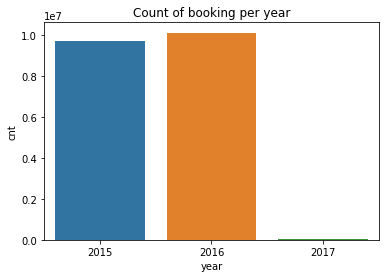

In [27]:
year_data = bike_dcopy.groupby(['year'])['cnt'].sum()
year_data = year_data.reset_index()
sns.barplot(x='year',y='cnt',data=year_data)
plt.title('Count of booking per year')
plt.show()

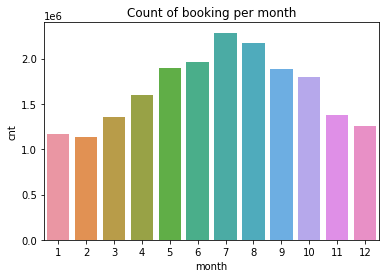

In [28]:
month_data = bike_dcopy.groupby(['month'])['cnt'].sum()
month_data = month_data.reset_index()
sns.barplot(x='month',y='cnt',data=month_data)
plt.title('Count of booking per month')
plt.show()

In [29]:
mon_year_data = bike_dcopy.groupby(['year','month'])['cnt'].sum()
mon_year_data = pd.DataFrame(mon_year_data)
mon_year_data.reset_index(inplace = True)
myy = mon_year_data.pivot('month','year','cnt').fillna(0)

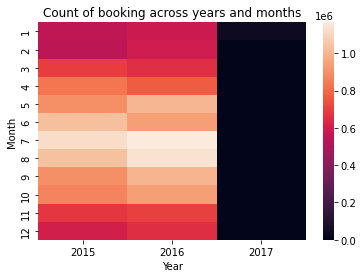

In [33]:
# to visualize the count of bike rentals across different months and years in a clear and concise manner. The heatmap makes it easy to identify patterns or trends in the data, such as months or years where bike rentals were particularly high or low.
sns.heatmap(myy)
plt.title('Count of booking across years and months')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

As infered earlier the data booking is almost same across all the months.

**Observations:** 
- The data covers a time period of almost two years, from 1st Jan 2011 to 19th Dec 2012, and the count of rented bikes is also within this time range.
- The maximum number of bikes are rented during the months of September and October, based on the available data.
- The count of rented bikes is lower in the colder seasons of winter (i.e., Nov, Dec, Jan, and Feb), as people tend to avoid bike rides during the cold weather.
- The dataset contains dates ranging from the 1st to the 19th of a given month.
- According to the month-wise bar plot, there is a low demand for bikes in the early months of the dataset, with an increase in demand starting from March 2012 onwards. However, there is a drop in demand during the colder months due to the winter season.
- As of the time of analysis, the number of bookings made in 2017 is almost zero.
- Based on the available data, there are approximately the same number of bookings made in each month.

In [48]:
#Univariate analysis for numerical/continuos variables
def num_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
    sns.histplot(col_data, kde=True, ax=ax, color = 'purple')
    ax.axvline(col_data.mean(), color='r', linestyle='--',linewidth=2)
    ax.axvline(col_data.median(), color='k', linestyle='dashed', linewidth=2)
    ax.axvline(col_data.mode()[0],color='y',linestyle='solid',linewidth=2)
    plt.tight_layout()

In [34]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16739 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     16739 non-null  datetime64[ns]
 1   cnt           16739 non-null  int64         
 2   t1            16739 non-null  float64       
 3   t2            16739 non-null  float64       
 4   hum           16739 non-null  float64       
 5   wind_speed    16739 non-null  float64       
 6   weather_code  16739 non-null  float64       
 7   is_holiday    16739 non-null  float64       
 8   is_weekend    16739 non-null  float64       
 9   season        16739 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.4 MB


In [35]:
bike_data.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [36]:
num_cols = ['t1','t2','hum','cnt','wind_speed']
num_cols

['t1', 't2', 'hum', 'cnt', 'wind_speed']

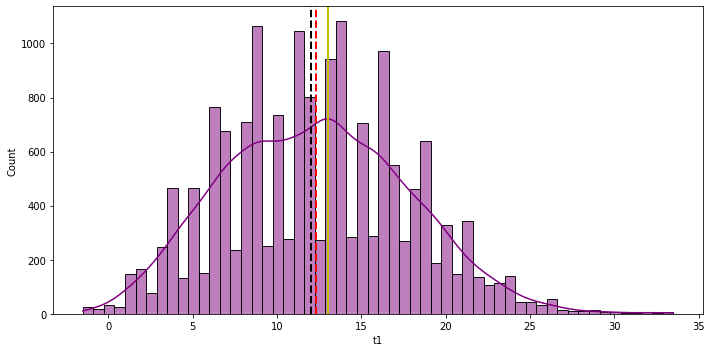

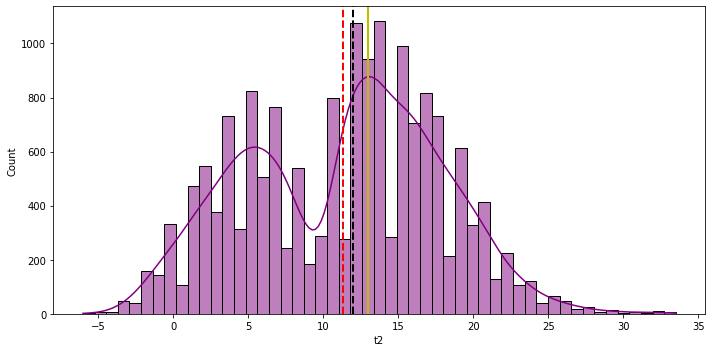

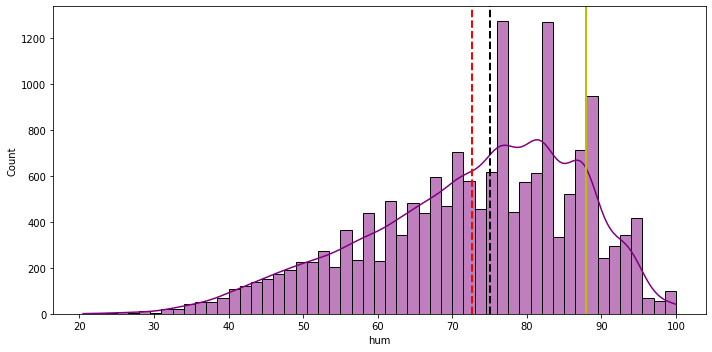

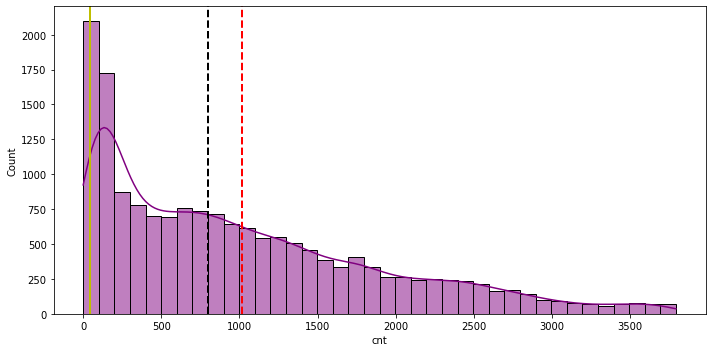

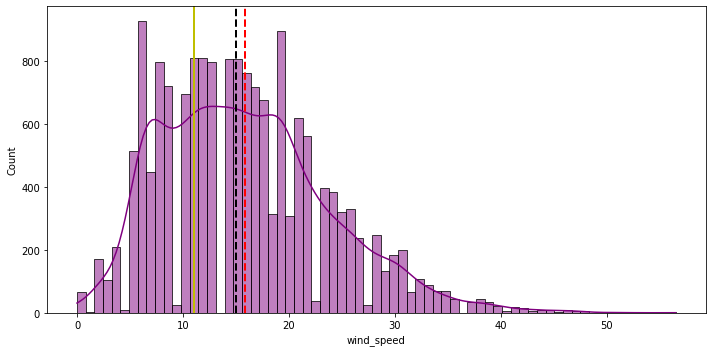

In [49]:
for i in num_cols:
    num_feat(bike_data[i])
    

**Observations for univariate numerical features:**
- The presence of outliers in windspeed and casual users indicates that windspeed is not distributed uniformly.
- The exponential decay curve for cnt suggests that as the number of bike renters increases, the frequency of rentals decreases. This indicates a negative correlation between cnt and the number of bike renters, where the demand for rented bikes decreases as more bikes are rented.

In [50]:
#EDA on Univariate Categorical variables
def cat_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    fig.suptitle(col_data.name+' wise sale',fontsize=15)
    sns.countplot(col_data,ax=ax[0])
    col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1], shadow = True)
    plt.tight_layout()

In [51]:
bike_data.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [52]:
cat_cols = ['season', 'is_holiday', 'is_weekend', 'weather_code']
cat_cols

['season', 'is_holiday', 'is_weekend', 'weather_code']

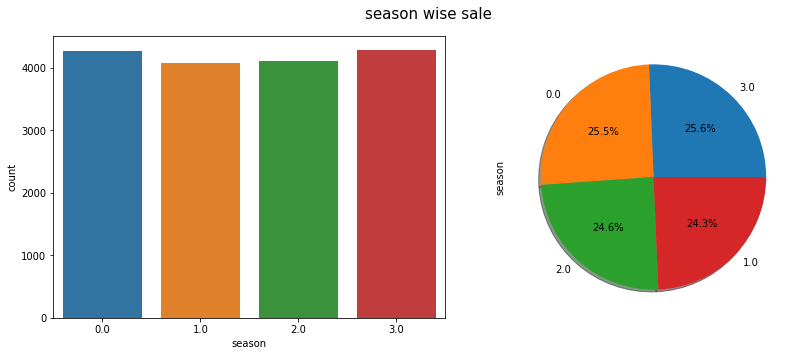

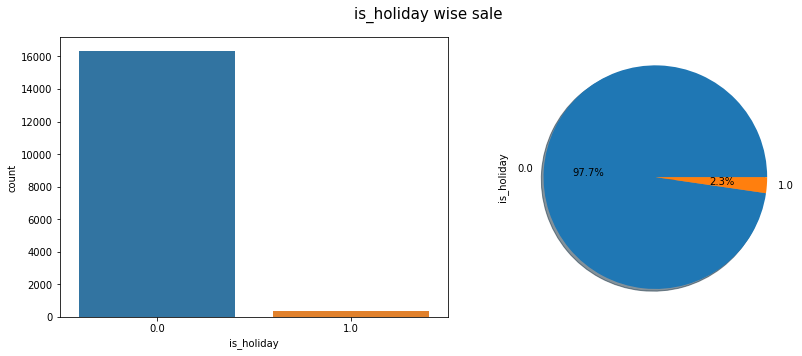

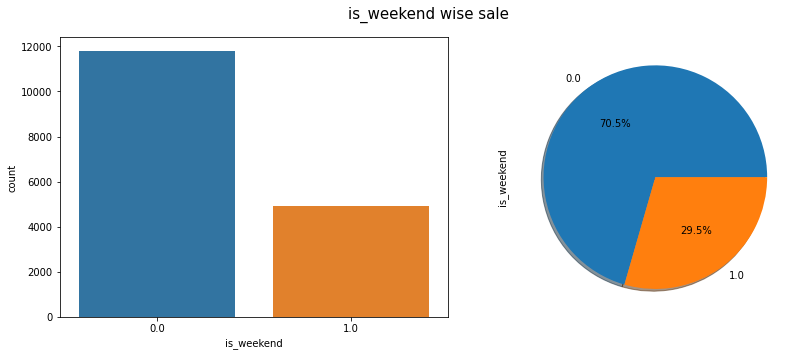

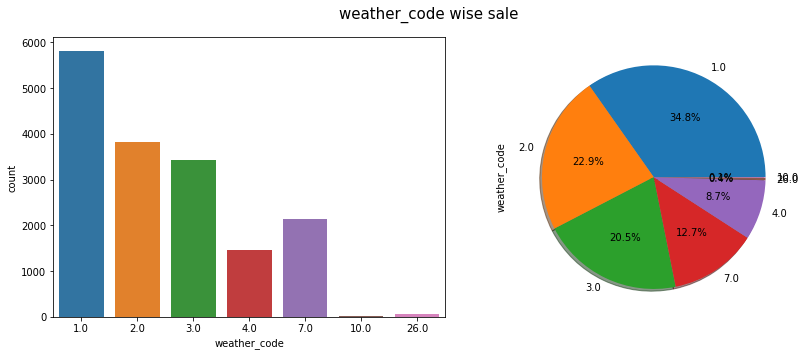

In [53]:
for i in cat_cols:
    cat_feat(bike_data[i])

**Observations for univariate categorical features:**
- For weather_code, 10th and 26th  (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) no. of users renting bikes is much low and hence it's good to drop the feature while doing further tests.
- cnt for bikes rentied in working day is much higher than non working day.
- During is_holidays, people don't prefer to ride bikes.
- When the weather_code is Clear with Few clouds, people tend to rent more  bikes for their comute.
- During the spring, summer, fall, winter, the cnt is more or less equal for the users renting bikes

**Corelation between Bivariate features:**


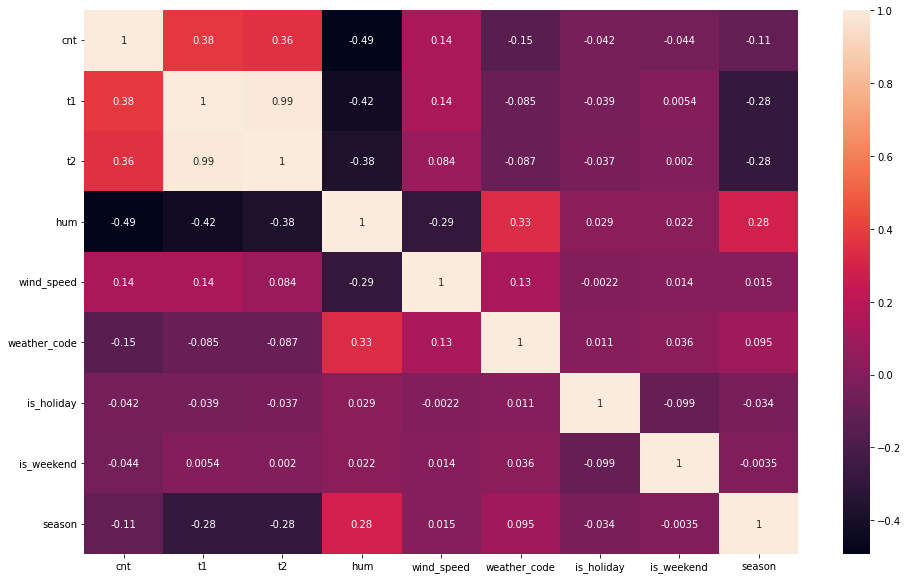

In [54]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_data.corr(),annot=True)
plt.show()

**Observations:**:
- The **registered user** cnt has higher corelation with the cnt as compared to the **casual user cnt**.
- The **windspeed and season** has a very low(near zero) positive corelation with the cnt which means, the windspeed and seasons doesn't have an effect in the demand of  bikes rented.
- The **t1erature and user specific feeling of heat/cold** has a moderated corelation (0.3) with the cnt. People tends to go ot in bright sunny day whne the t1 is normal whereas as during hrsh conditions such as too hot or too cold, the demand in the  bikes has seen a considerable dip.
- The casual users who rents  bikes likes to ride the bikes as the t1erature is suitable.
- When there's a is_holiday, user cnt has seen a considerable dip whereas in working days, the cnt is normal.

**Final Conclusion-**
- There are a total of 4 categorical features, namely Season, is_holiday, is_weekend, and weather_code, and 7 numerical/continuous features along with 1 datetime object, resulting in a total of 12 independent features with 10,886 rows. No missing data or duplicated rows are present in the dataset.

- The data covers a time period of almost 2 years, ranging from 1st January 2011 to 19th December 2012. During the months of September and October, the maximum number of bikes are rented. However, the bike rental count is less during the cold seasons of winter (November, December, January, February) when people prefer not to ride bikes due to the cold.

- The month-wise bar plot shows that the demand for bikes at the beginning of the dataset is quite low compared to months from March 2012 onwards. There's a drop in the middle of the dataset due to the cold and winter season. Outliers are present in windspeed and casual users, indicating that windspeed is not uniform, while the count of casual users varies as they are not registered and not serious about riding bikes.

- The exponential decay curve for the count (registered and non-registered users combined) indicates that as the number of users renting bikes increases, the frequency decreases. For weather_code, in the fourth category, i.e., Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, the number of users renting bikes is much lower. Hence it's better to drop this feature while conducting further tests.

- The count for bikes rented on working days is much higher than on non-working days. During holidays, people do not prefer to ride bikes. However, when the weather_code is Clear with Few clouds, people tend to rent more bikes for their commute.

- During spring, summer, fall, and winter, the count is more or less equal for the users renting bikes. The registered user count has a higher correlation with the count as compared to the casual user count. The windspeed and season have a very low (near zero) positive correlation with the count, indicating that windspeed and season do not have a significant effect on the demand for rented bikes.

- The temperature and user-specific feeling of heat/cold have a moderate correlation (0.3) with the count. People tend to go out on bright sunny days when the temperature is normal. However, during harsh conditions such as too hot or too cold, the demand for bikes has seen a considerable dip. Casual users who rent bikes prefer to ride when the temperature is suitable.

- During holidays, the user count has seen a considerable dip, whereas, on working days, the count is normal.

